# Project: Rain Prediction in Australia

# Import the Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Importing Dataset

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
df = pd.read_csv(url, header = None, na_values = '?')
df

# Data Preprocessing

In [1000]:
# Use the first row as the column names
df.columns=df.iloc[0]  
# Drop the first row
df = df.drop(0)

In [1001]:
# One Hot Encoding: Covert Categorical variables to Binary Variables

In [1002]:
df_sydney_processed = pd.get_dummies(data=df, columns = ['RainToday','WindGustDir','WindDir9am','WindDir3pm']) # Sample DataFrame with Categorical Data
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)
df_sydney_processed

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
1,2/1/2008,19.5,22.4,15.6,6.2,0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
2,2/2/2008,19.5,25.6,6,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
3,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
4,2/4/2008,20.2,22.8,18.8,2.2,0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
5,2/5/2008,19.7,25.7,77.4,4.8,0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,6/21/2017,8.6,19.6,0,2,7.8,37,22,20,73,...,False,False,False,False,True,False,False,False,False,False
3268,6/22/2017,9.3,19.2,0,2,9.2,30,20,7,78,...,False,False,False,False,False,False,False,False,False,False
3269,6/23/2017,9.4,17.7,0,2.4,2.7,24,15,13,85,...,False,False,False,False,False,False,False,False,False,False
3270,6/24/2017,10.1,19.3,0,1.4,9.3,43,17,19,56,...,False,False,False,False,False,False,False,True,False,False


In [1003]:
df_sydney_processed.drop('Date',axis=1,inplace=True) # Drop the Date columns from DataFram
df_sydney_processed = df_sydney_processed.astype(float) # Covert All columns to Float Data type
df_sydney_processed
# Export the Data set as CSV File
path = "/Users/gaurangbhimani/Desktop/Data_Material/Machine_learning_Project/Filtered_Data.csv"
df_sydney_processed.to_csv(path)   


In [1004]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1) # Remove Target column. so other alles are independet Varables
features

 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
1,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8.6,19.6,0.0,2.0,7.8,37.0,22.0,20.0,73.0,52.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3268,9.3,19.2,0.0,2.0,9.2,30.0,20.0,7.0,78.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3269,9.4,17.7,0.0,2.4,2.7,24.0,15.0,13.0,85.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3270,10.1,19.3,0.0,1.4,9.3,43.0,17.0,19.0,56.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1005]:
Y = df_sydney_processed['RainTomorrow']


# Regression Method: it used to Predicting Continous Data value

In [1006]:
from sklearn.model_selection import train_test_split
#Use the train_test_split function to split the features and Y dataframes with a test_size of 0.2 and the random_state set to 10
x_train,x_test,y_train,y_test = train_test_split(features, Y,test_size = 0.2,random_state = 10)


In [1007]:
from sklearn.linear_model import LinearRegression
# Create a Linear regression model
LinearReg = LinearRegression()

# Train the model using 

LinearReg.fit(x_train,y_train)

LinearReg.coef_


array([-2.36930781e-02,  1.30077882e-02,  7.28866239e-04,  6.49300575e-03,
       -3.51612796e-02,  4.23708750e-03,  1.83080115e-03,  7.89617873e-04,
        9.56307017e-04,  8.55992648e-03,  7.69696543e-03, -9.24419697e-03,
       -8.87118410e-03,  1.00496984e-02,  1.44680592e-02, -3.48113795e-03,
        3.33194624e+10,  3.33194624e+10, -1.43767142e+08, -1.43767142e+08,
       -1.43767142e+08, -1.43767142e+08, -1.43767142e+08, -1.43767142e+08,
       -1.43767142e+08, -1.43767142e+08, -1.43767142e+08, -1.43767142e+08,
       -1.43767142e+08, -1.43767142e+08, -1.43767142e+08, -1.43767142e+08,
       -1.43767142e+08, -1.43767142e+08, -7.26572484e+09, -7.26572484e+09,
       -7.26572484e+09, -7.26572484e+09, -7.26572484e+09, -7.26572484e+09,
       -7.26572484e+09, -7.26572484e+09, -7.26572484e+09, -7.26572484e+09,
       -7.26572484e+09, -7.26572484e+09, -7.26572484e+09, -7.26572484e+09,
       -7.26572484e+09, -7.26572484e+09,  4.29741525e+09,  4.29741525e+09,
        4.29741525e+09,  

In [1008]:
LinearReg.intercept_

-30207385707.40367

In [1009]:
# Now use the predict method on the testing data (x_test) and save it to the array predictions
predictions = LinearReg.predict(x_test)


In [1010]:
#Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predictions)
MSE

0.11572253325834554

In [1011]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predictions)
R2

0.4271224518697301

In [1012]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions)
MAE

0.25632179202014255

# Evaluation Metrics in Regression

In [1013]:
# Show the MAE, MSE, and R2 in a tabular format using data frame for the linear mode
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R^2'],
    'Value': [MAE, MSE, R2]
})
metrics_df

,Metric,Value
0,Mean Absolute Error (MAE),0.256322
1,Mean Squared Error (MSE),0.115723
2,R^2,0.427122


# Classification : Classified soome unknown items into discrete value of  classes.

# KNN : Predict the nearest K-Value according to training Data

In [1014]:
# K-Nearest Neighbour: Classified the Target varible and fine the nearest neighbor

from sklearn.neighbors import KNeighborsClassifier

## Create a KNN Model with n_neighbors to set to 5
KNN = KNeighborsClassifier(n_neighbors=5)

# Train the Model
KNN.fit(x_train,y_train)

# Make Predictions
KNN_pred = KNN.predict(x_test)


# Evaluation Metrics in Classification

# 1. Jaccard Index : Interesection of Two label set / Union of Two label set

In [1015]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, jaccard_score
from sklearn.metrics import confusion_matrix
jaccard_KNN = []
for class_label in np.unique(y_train):
    y_test_binary = (y_test).astype(int)
    KNN_pred_binary = (KNN_pred).astype(int)
    jaccard = jaccard_score(y_test_binary, KNN_pred_binary)
    jaccard_KNN.append(jaccard)
jaccard_KNN    
    

[0.4660633484162896, 0.4660633484162896]

# 2. Confusion matrix 

In [1016]:
conf_matrix = confusion_matrix(y_test,KNN_pred) # TP , FN
conf_matrix                                     # FP, TN



array([[434,  37],
       [ 81, 103]])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


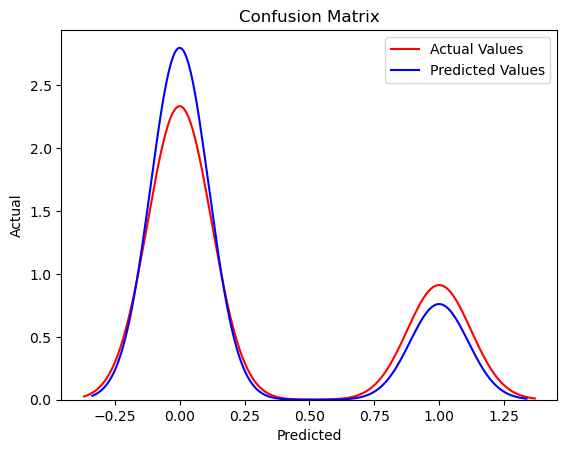

In [1017]:
ax1 = sns.kdeplot(y_test, color = "r", label = 'Actual Values') # Plotting the actual value
sns.kdeplot(KNN_pred,  color = "b",label = "Predicted Values", ax= ax1 ) # Plotting the predicated value
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.legend()
plt.show()

# 3. Precision, Recall and F1 Score

In [1018]:
precision_KNN = precision_score(y_test,KNN_pred) #  Precision = TP/ (TP+FP) 
precision_KNN

0.7357142857142858

In [1019]:
recall_KNN = recall_score(y_test,KNN_pred) # Recall = TP / (TP + FN)
recall_KNN

0.5597826086956522

In [1020]:
f1_KNN = f1_score(y_test,KNN_pred)      # F1_Score = 2(prc * rec)/ (prc + rec)
f1_KNN  

0.6358024691358024

In [1021]:
accuracy_KNN = accuracy_score(y_test,KNN_pred)
accuracy_KNN

0.8198473282442749

In [1022]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1_score'],
    'Value': [accuracy_KNN,jaccard_KNN,f1_KNN  ]
})
metrics_df

,Metric,Value
0,Accuracy Score,0.819847
1,Jaccard Index,"[0.4660633484162896, 0.4660633484162896]"
2,F1_score,0.635802


# Decision Tree : Split the Data based on value of the best attributes

In [1023]:
# Here, We are predict the chance of rain in tomorrow according to our feature data

# Spilt the our Labeled Data 

In [1024]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(x_train, y_train)

# Make predictions
tree_pred = decision_tree.predict(x_test)

In [1025]:
conf_matrix = confusion_matrix(y_test,tree_pred) # TP , TF
conf_matrix                                     # FP, FN


array([[389,  82],
       [ 82, 102]])

# Evaluation of Decision Tree 

In [1026]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, jaccard_score
from sklearn.metrics import confusion_matrix
jaccard_tree = []
for class_label in np.unique(y_train):
    y_test_binary = (y_test).astype(int)
    tree_pred_binary = (tree_pred).astype(int)
    jaccard = jaccard_score(y_test_binary, tree_pred_binary)
    jaccard_tree.append(jaccard)
jaccard_tree  

[0.38345864661654133, 0.38345864661654133]

In [1027]:
precision_tree = precision_score(y_test,tree_pred) #  Precision = TP/ (TP+FP) 
precision_tree

0.5543478260869565

In [1028]:
recall_tree = recall_score(y_test,tree_pred) # Recall = TP / (TP + FN)
recall_tree

0.5543478260869565

In [1029]:
f1_tree = f1_score(y_test,tree_pred)      # F1_Score = 2(prc * rec)/ (prc + rec)
f1_tree

0.5543478260869565

In [1030]:
accuracy_tree = accuracy_score(y_test,tree_pred)
accuracy_tree

0.749618320610687

In [1031]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1_score'],
    'Value': [accuracy_tree,jaccard_tree,f1_tree  ]
})
metrics_df

,Metric,Value
0,Accuracy Score,0.749618
1,Jaccard Index,"[0.38345864661654133, 0.38345864661654133]"
2,F1_score,0.554348


In [1032]:
# Conclusion : We get more accurate result by KNN compared to Decision tree.

# Because our data set in from on numerical and it is hard to spilt it by such a category.

# If we have a DataFrame in Categorical form then Decision Tree will give better result.

# Logistic Regression:

In [1033]:

# Point 1: We predict value (Dependent Variable) in Binary form (0 and 1, Yes or No)
# Independent Variable should be in Continuos form


In [1034]:
conf_matrix = confusion_matrix(y_test,log_pred) 
conf_matrix  


array([[443,  28],
       [ 74, 110]])

# Evaluation of LogisticRegression

In [1035]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, jaccard_score
from sklearn.metrics import confusion_matrix
jaccard_log = []
for class_label in np.unique(y_train):
    y_test_binary = (y_test).astype(int)
    log_pred_binary = (log_pred).astype(int)
    jaccard = jaccard_score(y_test_binary, log_pred_binary)
    jaccard_log.append(jaccard)
jaccard_log

[0.5188679245283019, 0.5188679245283019]

In [1036]:
precision_log = precision_score(y_test,log_pred) #  Precision = TP/ (TP+FP) 
precision_log

0.7971014492753623

In [1037]:
recall_log = recall_score(y_test,log_pred) # Recall = TP / (TP + FN)
recall_log

0.5978260869565217

In [1038]:
f1_log = f1_score(y_test,log_pred)      # F1_Score = 2(prc * rec)/ (prc + rec)
f1_log

0.6832298136645962

In [1039]:
accuracy_log = accuracy_score(y_test,log_pred)
accuracy_log

0.8442748091603054

In [1040]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1_score'],
    'Value': [accuracy_log,jaccard_log,f1_log  ]
})
metrics_df

,Metric,Value
0,Accuracy Score,0.844275
1,Jaccard Index,"[0.5188679245283019, 0.5188679245283019]"
2,F1_score,0.68323


In [1041]:
# Out of three Algorithms: Logistic regression method is suitable for this DataFrame


# NeuralNetworks : Useful for time series analysis, time series forecasting, Image classification, Object Detectrion

# 1. Feedforward Neural Network: Input node to Hidden Node to Output Node

In [1042]:
from sklearn.neural_network import MLPClassifier

In [1043]:
# Create the feedforward neural network model (MLP)
# Setting random_state to ensure reproducibility
# One hidden layer with 100 neurons
mlp = MLPClassifier (hidden_layer_sizes=(100,), max_iter=200, random_state=42)
                    
# Train the model
mlp.fit(x_train, y_train)
                    
# Make predictions
FFN_pred = mlp.predict(x_test)                   

In [1044]:
# Evaluation of the FeedForward Neural Network

In [1045]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, jaccard_score
from sklearn.metrics import confusion_matrix
jaccard_FFN = []
for class_label in np.unique(y_train):
    y_test_binary = (y_test).astype(int)
    FFN_pred_binary = (FFN_pred).astype(int)
    jaccard = jaccard_score(y_test_binary, FFN_pred_binary)
    jaccard_FFN.append(jaccard)
jaccard_FFN

[0.37755102040816324, 0.37755102040816324]

In [1046]:
conf_matrix = confusion_matrix(y_test,FFN_pred) 
conf_matrix 

array([[459,  12],
       [110,  74]])

In [1047]:
precision_FFN = precision_score(y_test,FFN_pred) #  Precision = TP/ (TP+FP) 
precision_FFN

0.8604651162790697

In [1048]:
recall_FFN = recall_score(y_test,FFN_pred) # Recall = TP / (TP + FN)
recall_FFN

0.40217391304347827

In [1049]:
f1_FFN = f1_score(y_test,FFN_pred)      # F1_Score = 2(prc * rec)/ (prc + rec)
f1_FFN

0.5481481481481482

In [1050]:
accuracy_FFN = accuracy_score(y_test,FFN_pred)
accuracy_FFN

0.8137404580152672

In [1051]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1_score'],
    'Value': [accuracy_FFN,jaccard_FFN,f1_FFN  ]
})
metrics_df

,Metric,Value
0,Accuracy Score,0.81374
1,Jaccard Index,"[0.37755102040816324, 0.37755102040816324]"
2,F1_score,0.548148


# 2: Recurrent Neural Networks with LSTM Model: Hidden layer has memory of previous input using loop within the network: 

In [1062]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense



# Split the data
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

# Reshape for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert y_train and y_test to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_labels = y_test  # Preserve the original y_test labels for later comparison
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Predict
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
conf_matrix


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7449 - loss: 0.7371 - val_accuracy: 0.7267 - val_loss: 0.6325
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7524 - loss: 0.6053 - val_accuracy: 0.7267 - val_loss: 0.5886
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.7346 - loss: 0.5802 - val_accuracy: 0.7267 - val_loss: 0.5689
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.7489 - loss: 0.5513 - val_accuracy: 0.7267 - val_loss: 0.5595
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7464 - loss: 0.5556 - val_accuracy: 0.7267 - val_loss: 0.5491
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7367 - loss: 0.5533 - val_accuracy: 0.7267 - val_loss: 0.5471
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.7343 - loss: 0.5424 - val_accuracy: 0.7267 - val_loss: 0.5274
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.7510 - loss: 0.5140 - val_accuracy: 0.7267 - val_lo

array([[452,  24],
       [ 93,  86]])

# Evaluation of RNN

In [1063]:
precision_RNN = precision_score(y_test_labels,y_pred_labels) #  Precision = TP/ (TP+FP) 
precision_RNN

0.7818181818181819

In [1064]:
recall_RNN = recall_score(y_test_labels,y_pred_labels) # Recall = TP / (TP + FN)
recall_RNN

0.48044692737430167

In [1065]:
f1_RNN = f1_score(y_test_labels,y_pred_labels)      # F1_Score = 2(prc * rec)/ (prc + rec)
f1_RNN

0.5951557093425606

In [1066]:
accuracy_RNN = accuracy_score(y_test_labels,y_pred_labels)
accuracy_RNN

0.8213740458015267

In [1068]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy Score',  'F1_score'],
    'Value': [accuracy_RNN,f1_RNN ]
})
metrics_df

,Metric,Value
0,Accuracy Score,0.821374
1,F1_score,0.595156
